## MATPLOTLIB ASSIGNMENT - Problem1

***

#### Scipy: 
#### We have the min and max temperatures in a city in India for each months of the year. We would like to find a function to describe this and show it graphically, the dataset given below:
#### Task:
####    1. fitting it to the periodic function
####    2. plot the fit
####    Data
####    Max=39,41,43,47,49,51,45,38,37,29,27,25
####    Min=21,23,27,28,32,35,31,28,21,19,17,18

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
%matplotlib inline

In [3]:
Max=np.array([39,41,43,47,49,51,45,38,37,29,27,25])
Min=np.array([21,23,27,28,32,35,31,28,21,19,17,18])
Months=np.arange(12)

In [4]:
Max

array([39, 41, 43, 47, 49, 51, 45, 38, 37, 29, 27, 25])

In [5]:
Min

array([21, 23, 27, 28, 32, 35, 31, 28, 21, 19, 17, 18])

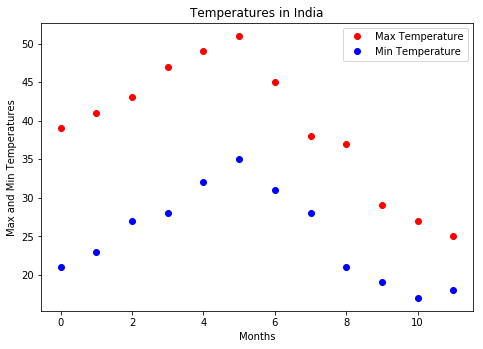

In [6]:
fig=plt.figure()
axes=fig.add_axes([0.1,0.1,1,1])

axes.plot(Months,Max,'ro',label='Max Temperature')
axes.plot(Months,Min,'bo',label='Min Temperature')

axes.set_xlabel('Months')
axes.set_ylabel('Max and Min Temperatures')
axes.set_title('Temperatures in India')
axes.legend(loc=0)

plt.show()


In [7]:
#Writing the periodic function for curve fitting

In [8]:
from scipy import optimize

In [9]:
def yearly_temp(times, avg, ampl, time_offset):
    return (avg+ ampl * np.cos((times + time_offset) * 2 * np.pi / times.max()))


In [10]:
res_max, cov_max = optimize.curve_fit(yearly_temp, Months,Max, [30, 20, 0]) 
res_min, cov_min =optimize.curve_fit(yearly_temp, Months,Min, [50, 10, 0])
optimize.curve_fit(yearly_temp, Months,Min, [40, 10, 0])

(array([25.55626462, -7.74472964,  0.93101294]),
 array([[ 0.19941393, -0.02644226, -0.00351662],
        [-0.02644226,  0.38392581, -0.00606194],
        [-0.00351662, -0.00606194,  0.02114125]]))

In [11]:
#to plot the fit

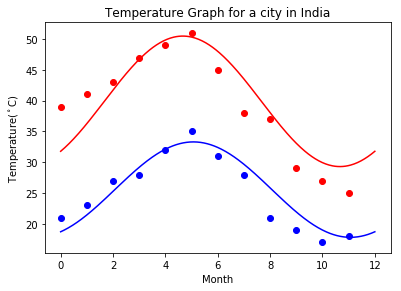

In [12]:
days=np.linspace(0,12,num=365)
fig=plt.figure()
axes=fig.add_axes([0.1,0.1,0.8,0.8])
axes.plot(Months, Max, 'ro')
axes.plot(days, yearly_temp(days, *res_max), 'r-')
axes.plot(Months, Min, 'bo')
axes.plot(days, yearly_temp(days, *res_min), 'b-')
axes.set_xlabel('Month')
axes.set_ylabel('Temperature($^\circ$C)')
axes.set_title('Temperature Graph for a city in India')
plt.show()